In [1]:
import pickle
import pandas as pd
import os
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch.nn.init as init
from torch.autograd import Variable
import torch.utils.data as utils
import itertools
from pandas.core.common import flatten
import matplotlib.pyplot as plt


In [2]:
output = torch.load('/scratch/sb3923/time_series/EarlySepsisPrediction/RNN-missingval/checkpoints/6_hours_ahead_norm_test_outputs_3.pt')
label = torch.load('/scratch/sb3923/time_series/EarlySepsisPrediction/RNN-missingval/checkpoints/6_hours_ahead_norm_test_labels_3.pt')


In [3]:
o=list(flatten(output))  
l=list(flatten(label))                             

In [4]:
len(o)

7264

In [5]:
sum(l)

94.0

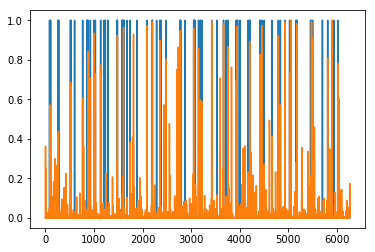

In [6]:
plt.figure()
plt.plot(l[1000:])
plt.plot(o[1000:])
plt.show()

In [7]:
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(l, o)
roc_auc=metrics.auc(fpr, tpr)

print(roc_auc)

0.953566871421


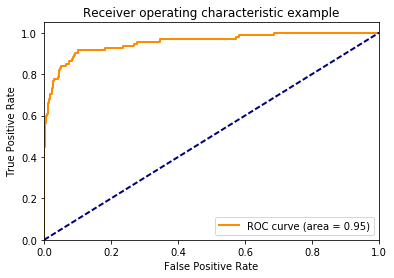

In [8]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# ppv

In [9]:
import numpy as np
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(l, o)


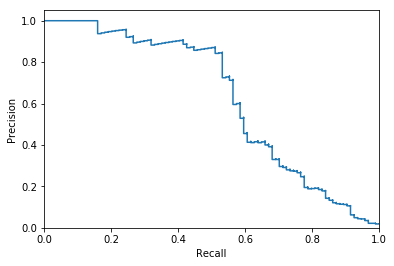

In [10]:
plt.figure()
plt.step(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
#plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))
plt.show()

In [10]:
from sklearn.metrics import average_precision_score
average_precision_score(l,o)

0.62372958569260661